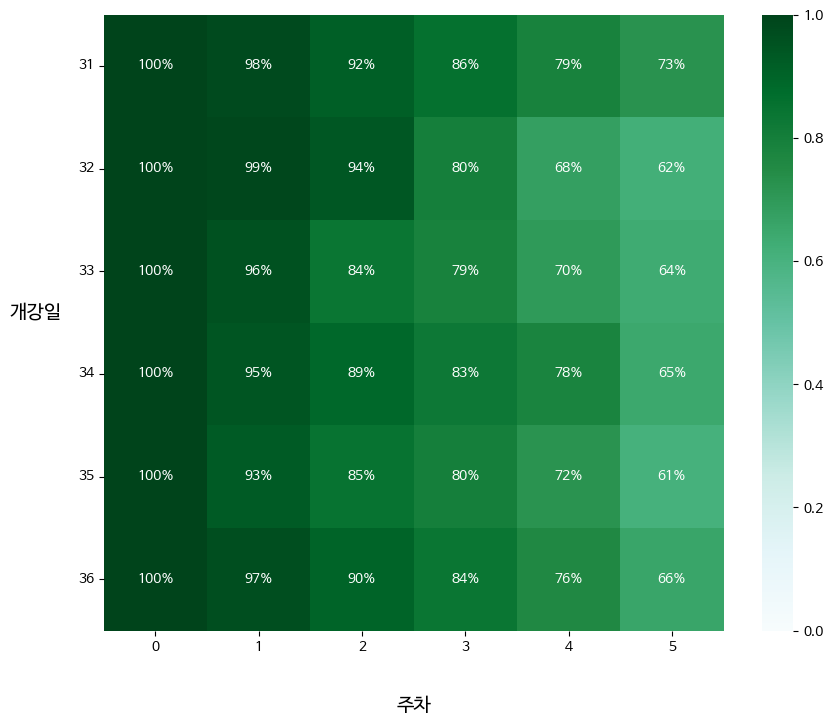

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic')
sparta_data = pd.read_table('/content/cohort_data.csv', sep = ',')
sparta_data
#created at을 가지고 수강주 구하기
format='%Y-%m-%dT%H:%M:%S.%f'
sparta_data['start_time'] = pd.to_datetime(sparta_data['created_at'], format=format,infer_datetime_format=True)
#수강 시작 주 구하기
sparta_data['start_week']= sparta_data['start_time'].dt.isocalendar().week
sparta_data.tail()
#unique value 추려내기 (주차)
category_range = set(sparta_data['start_week'])
category_range

#이제는 progress_rate column을 강의 주차로 변경
#먼저 list로 rate만 뽑아내고
progress_rate = list(sparta_data['progress_rate'])
#강의 주차로 rate 변경
#범주를 구분하는 기준 bins 처음(0)과 끝(100) 잊지 말고 기입
bins = [0,4.11,26.03,41.10,61.64,80.82,100]
#구분한 범주의 라벨 labels
labes=[0,1,2,3,4,5]
#범주화에 사용하는 함수 pd.cut
cuts = pd.cut(progress_rate,bins, right=True,include_lowest=True, labels=labes)
cuts
#결과물을 테이블로 변경하기
cuts = pd.DataFrame(cuts)
cuts.tail()

#concat() 함수를 이용하여, sparta_data 테이블과, cuts 테이블 병합 할수 있습니다 :)
sparta_data = pd.concat([sparta_data,cuts],axis=1, join='inner')

#column 이름 변경
sparta_data.columns=['created_at','user_id','name','progress_rate','start_time','start_week',"week"]

#기존의 테이블을, start_week와, week로 묶기
grouping = sparta_data.groupby(['start_week','week'])
grouping.head()
#user id로 unique 한 값 만들기
cohort_data = grouping['user_id'].apply(pd.Series.nunique)
cohort_data = pd.DataFrame(cohort_data)

#각 주차에 있는 사람들은 앞선 주차들 다 수강한 거니까 반복문으로 앞에 데이터를 더하기
f=31
for i in range(6):
	#5주차의 강의가 마지막이고, 0주차까지 이니, 시작은 5에서 시작해 1씩 0까지 감소 시킬수 있어요!
  for j in range(5, 0, -1):
    cohort_data.at[(f,j-1), 'user_id'] = int(cohort_data.at[(f,j),'user_id']) +  int(cohort_data.at[(f,j-1),'user_id'])
  f=f+1

#인덱스 새로 설정
cohort_data = cohort_data.reset_index()

#retention table 만들기
cohort_counts = cohort_data.pivot(index="start_week",
                                  columns="week",
                                  values="user_id")
#단위 통일 - percentage 형태로
# 앞서 만든 피벗 테이블을 retention 변수에 저장하기
retention = cohort_counts
#각 주(week) 별 최초 수강생 수만 가져오기 (나눠줄때, 분모가 되는 부분!)
cohort_sizes = cohort_counts.iloc[:,0]
# 표의 단일 데이터에 최초 수강생의 수를 나누어, 각 주당 수강생 수강율 나타내기!  'axis=0'은 주로 행(row) 방향으로 계산을 수행
retention = cohort_counts.divide(cohort_sizes, axis=0)
#round 함수로 3자리 수에서 반올림 한 후 100곱해서 %로 만들기
retention.round(3)*100

#히트맵 만들기
#테이블 크기 설정 하기
#테이블 크기 설정 하기
plt.figure(figsize=(10,8))

sns.heatmap(data = retention,
           annot=True,
           fmt='.0%',
           vmin=0,
           vmax=1,
           cmap="BuGn")


plt.xlabel('주차', fontsize=14,labelpad=30)

plt.ylabel('개강일', fontsize=14,rotation=360,labelpad=30)
plt.yticks(rotation=360)

plt.show()

#null 값 확인

```
df.info()

```
#자료형 확인

```
type(df['확인할 column'][아무 인덱스])
```

#날짜 str에서 날짜 데이터로 포맷팅

```
format='%Y-%m-%dT%H:%M:%S.%f'
sparta_data['start_time'] = pd.to_datetime(sparta_data['created_at'], format=format,infer_datetime_format=True)
sparta_data.tail()
```
다시 하고 나서 info 해보면 아래와 같이 나옴
datetime64[ns]

#파이썬 내장함수 이용해서 수강일정 확인
아래 코드를 통해서 앞에서 바꾼 날짜 데이터가 일년에 몇번째 주인지 확인할 수 있음

```
#수강 시작 주 구하기
sparta_data['start_week']= sparta_data['start_time'].dt.isocalendar().week
sparta_data.tail()
```

#set 사용해서 Unique value만 뽑아 볼 수 있음
`set(df['column'])`

#cut과 bins 사용해서 범주화하기


```
#범주를 구분하는 기준 bins 처음(0)과 끝(100) 잊지 말고 기입
bins = [0,4.11,26.03,41.10,61.64,80.82,100]
#구분한 범주의 라벨 labels
labes=[0,1,2,3,4,5]
#범주화에 사용하는 함수 pd.cut
cuts = pd.cut(progress_rate,bins, right=True,include_lowest=True, labels=labes)
cuts
```

#DataFrame으로 Pandas 표 만들기


```
새로운 df = pd.DataFrame(df로 쓸 데이터셋)
```

#만든 표를 기존 표에 병합
concat함수 이용

```
#concat() 함수를 이용하여, sparta_data 테이블과, cuts 테이블 병합
sparta_data = pd.concat([sparta_data,cuts],axis=1, join='inner')
sparta_data.head()
```

#column 명 변경은 list로 다 넘겨주기


```
#column 이름 변경
sparta_data.columns=['created_at','user_id','name','progress_rate','start_time','start_week',"week"]
sparta_data.head()
```


#각 주차별로 groupby하는 걸 table로 만들기

```
#기존의 테이블을, start_week와, week로 묶기
grouping = sparta_data.groupby(['start_week','week'])
grouping.head()
#user id로 unique 한 값 만들기
cohort_data = grouping['user_id'].apply(pd.Series.nunique)
cohort_data = pd.DataFrame(cohort_data)
cohort_data.head(5)
```

#히트맵은 seaborn 라이브러리가 필요함
기본 문법은 아래와 같습니당

```
sns.heatmap(data="필요한 데이터 입력하기",
           annot=True, #각 cell의 데이터 표기 유무를 나타냅니다!
           fmt='.0%', #values(데이터의 값) 값의 소수점 표기
           vmin=0,#최소값 설정
           vmax=1,#최댓값 설정
           cmap="BuGn" #히트맵의 색을 설정합니다
						)
```



In [30]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 10 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (32.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120880 files and direc